# Working with satellite and image data

Images area a common format for data in a wide variety of applications. Increasingly, aerial and drone photography is becoming popular for collecting field data and satellite images provide a free, publicly available data source. It is useful for us to be able to load, manipulate, analyze, and visualize image data directly in our python scripts. In order to effectively work with images, we need to be aware of some conventions of image data storage and visualization. 

By the end of this lecture, you will be able to 
- list common data types and formats used in storing image data
- use scikit-images to load and view images
- rescale image brightness to change the contrast
- load Landsat satellite imagery from AWS

## Python packages for working with image data

While the community developed model for Python provides many advantages, it can also lead to redundancies and incompatibilities of common procedures between different packages. When choosing a package for image data, we need to be aware that there are several popular image processing packages, which share common namespaces, but do not function in identical or entirely compatible ways. 

Some of the common packages are:

Matplotlib/numpy which include a few basic features

![Matplotlib_logo](https://miro.medium.com/max/856/1*BLx1p0j0zVhPf_VC-OTwCQ.png)

PIL/Pillow

![Pillow_logo](https://miro.medium.com/max/625/1*n-oldgIbCtkbXjd71TeSVA.png)

OpenCV

![OpenCV_logo](https://miro.medium.com/max/305/1*bSmg_pzoj3oJeMHjGPUVxg.png)

Scikit-image

![SKimage_logo](https://miro.medium.com/max/625/1*-fFOUSQV2DRlkExPOCqg3w.png)

For this lesson, we will use Scikit-image and Matplotlib. 

In [2]:
from matplotlib import pyplot as plt
import numpy as np

from skimage import data
from skimage import io

We'll start by examining some of the stock photos available from scikit-image to understand a bit more about picture data structures.

Here we load in a photo from skimage.data that has the name hubble_deep_field and visualize it using the Matplotlib command imshow.

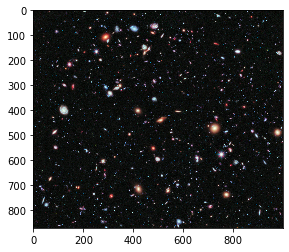

In [3]:
name = 'hubble_deep_field'

caller = getattr(data, name)
hubble = caller()

plt.imshow(hubble)

There are a few observations we can make right away. This is a color image and from the tick marks we can see that the indices are increasing from left to right and from top to bottom. This is different from our default color plots which count from right to left and bottom to top!

Let's inspect the data that we have loaded. 

In [4]:
type(hubble)

numpy.ndarray

In [5]:
hubble.dtype

dtype('uint8')

In [6]:
hubble.max()

255

In [7]:
hubble.min()

0

In [8]:
hubble.shape

(872, 1000, 3)

Scikit-image has loaded in our data as a numpy array witha data type of unint8: an 8-bit unsigned integer. This means that each pixel is represented by 8 zeros and ones (bits) and can represent 2^8 distint values that range between 0 and 255. We can see the shape of our array is 872x1000x3. The first two dimensions represent the horizontal and vertical dimensions, counting, as noted above, from left to right and top to bottom. 

The final dimension with a length of three is how we represent color images. Color cameras register color using three *channels*: red, green, and blue. The brightness in each channel ranges from 0 to 255 where 0 is completely dark and 255 is completely bright, so for example a black pixel would have values [0, 0, 0] and a purely red pixel [255 0 0]. 

We can pull these channels apart and view them individually: 

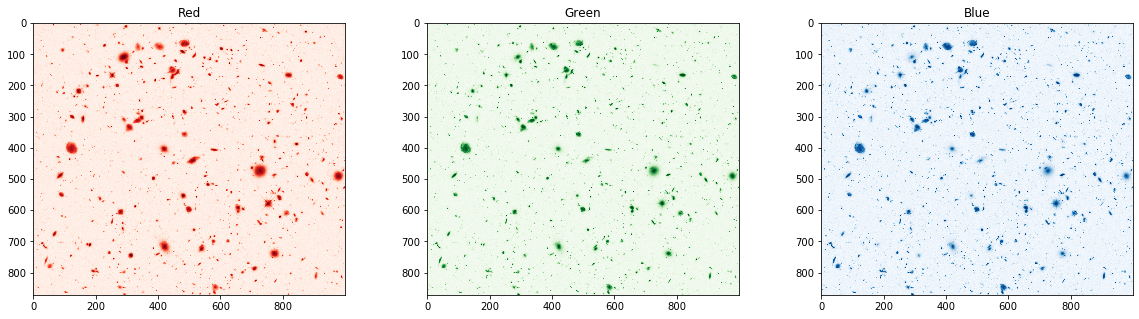

In [9]:
fig, ax = plt.subplots(figsize=(20,5), ncols=3)

for i, channel in enumerate(['Red', 'Green', 'Blue']): # enumerate returns both the object from our list and the corresponding index
    ax[i].imshow(hubble[:,:,i], cmap=channel + 's') # Creates colormap names Reds, Greens, and Blues
    ax[i].set_title(channel)

We can see that in this image the background is dark in all three channels and most of the bright pixels are bright in all three, but slight differences between the three give the color

We can perform any of the usual operations on our numpy array such as slicing to identify a portion of our data. We can use this to zoom in on a particular region of the image. 

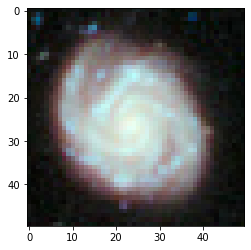

In [10]:
plt.imshow(hubble[375:425, 100:150, :]);

Let's load a different example:

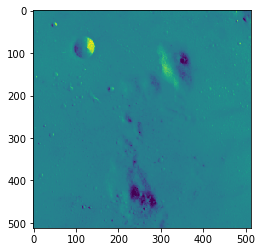

In [11]:
name = 'moon'

caller = getattr(data, name)
moon = caller()

plt.imshow(moon)

Notice that this image loaded using a blue to yellow colormap (the python default viridis). This is likely not the color scale we want for this black and white image. We can use Matplotlib to manually set a gray colormap:

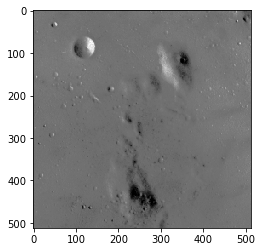

In [16]:
plt.imshow(moon, cmap=plt.cm.gray);

Or we can try out the scikit version of imshow. In this case, imshow is within skimage.io which we loaded in above as io:

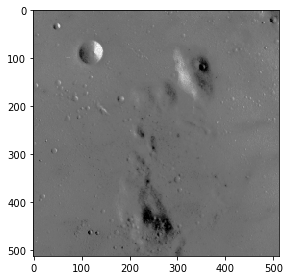

In [17]:
io.imshow(moon);

Note that scikit-image has chosen a gray colormap by default. 

If we inspect this array, we can see that the shape is only two dimensional. It lacks the color channels in the previous image and has only one brightness value for each pixel, which is typically used for black and white images, but can be any measure of intensity.

In [14]:
moon.shape

(512, 512)

In [15]:
moon.dtype

dtype('uint8')

Sometimes we may find it easier to work with other data types for our images. When we use data types other than uint8, we choose values to go between zero and one. Convert the data to type float: 

In [18]:
image_float = moon.astype('float')/255

image_float.max()

1.0

And we can see that using imshow on a float between zero and one is identical to uint8:

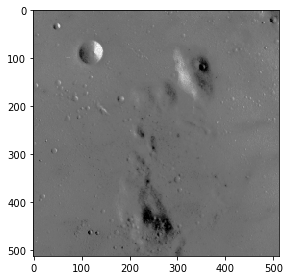

In [19]:
io.imshow(image_float);

As we look at this image, we can see that there are a few small areas that have particularly bright pixels and other areas that are particulraly dark, but the majority of the image is all about the same color. A common procedure in image analysis if we are interested in this middle area is to change the contrast to highlight our features of interest.

We can look at the image distribution to get a better sense of the frequency of pixel brightness in our image.

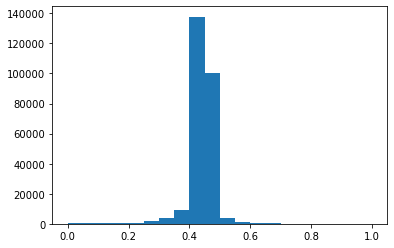

In [22]:
plt.hist(image_float.flatten(), bins=20); 
# Use flatten to remove information about the position of the pixels, otherwise we get a separate histogram for each colummn

In [25]:
from skimage import exposure

In [29]:
p2, p98 = np.percentile(image_float, (2,98)) # get out lower and upper brightnesses that remove the lowest and highest 2% of pixels
print(p2, p98)

0.3058823529411765 0.5058823529411764


In [27]:
img_rescale = exposure.rescale_intensity(image_float, in_range=(p2,p98)) # apply to our image

Plot the orginal images side-by-side and note the increased contrast in the intermediate brightness images, but saturation in the light and dark areas. 

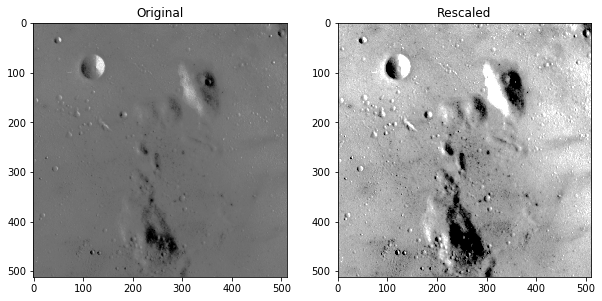

In [30]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].imshow(image_float, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[1].imshow(img_rescale, cmap=plt.cm.gray)
ax[1].set_title('Rescaled');

Scikit-images can also loadd in images from a file or url

In [32]:
url = 'https://wolf.org/wp-content/uploads/2019/09/howl-495x400.jpg'
img = io.imread(url)

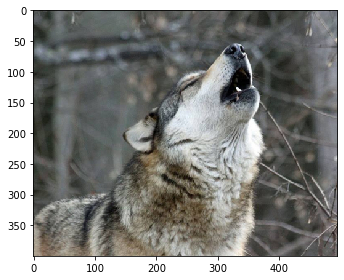

In [33]:
io.imshow(img);

In [32]:
type(img)

numpy.ndarray

## Satellite images

Satellite imagery from the Landsat constellation is avilable free online through Amazon Web Services (AWS) [here](https://registry.opendata.aws/landsat-8/). Find more information about data collection and access in the Landsat on AWS [documentation page](https://docs.opendata.aws/landsat-pds/readme.html). There are many online GUIs to help you view and download images, but we will look at how to download scenes straight from a Juypter notebook. 

First we will need a few more imports to help us work with tabular data and times. Also we will import a new package rasterio that enables us to work with geospatial raster data. 

In [35]:
import pandas as pd
import datetime as dt
import rasterio

In order to download the appropriate data, we first need to find the dates and times of data that is available. We will pull a list of all available data from AWS:

In [36]:
url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz'
scene_list = pd.read_csv(url)

In [35]:
scene_list

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
0,LC08_L1TP_149039_20170411_20170415_01_T1,LC81490392017101LGN00,2017-04-11 05:36:29.349932,0.00,L1TP,149,39,29.22165,72.41205,31.34742,74.84666,https://s3-us-west-2.amazonaws.com/landsat-pds...
1,LC08_L1TP_012001_20170411_20170415_01_T1,LC80120012017101LGN00,2017-04-11 15:14:40.001201,0.15,L1TP,12,1,79.51504,-22.06995,81.90314,-7.44339,https://s3-us-west-2.amazonaws.com/landsat-pds...
2,LC08_L1TP_012002_20170411_20170415_01_T1,LC80120022017101LGN00,2017-04-11 15:15:03.871058,0.38,L1TP,12,2,78.74882,-29.24387,81.14549,-15.04330,https://s3-us-west-2.amazonaws.com/landsat-pds...
3,LC08_L1TP_012010_20170411_20170415_01_T1,LC80120102017101LGN00,2017-04-11 15:18:14.918879,0.02,L1TP,12,10,69.67856,-56.04655,72.02949,-48.71678,https://s3-us-west-2.amazonaws.com/landsat-pds...
4,LC08_L1TP_012011_20170411_20170415_01_T1,LC80120112017101LGN00,2017-04-11 15:18:38.780265,10.65,L1TP,12,11,68.38187,-57.33186,70.76840,-51.13822,https://s3-us-west-2.amazonaws.com/landsat-pds...
5,LC08_L1TP_012019_20170411_20170415_01_T1,LC80120192017101LGN00,2017-04-11 15:21:49.747601,21.10,L1TP,12,19,57.55978,-66.08671,59.77420,-61.80908,https://s3-us-west-2.amazonaws.com/landsat-pds...
6,LC08_L1TP_012023_20170411_20170415_01_T1,LC80120232017101LGN00,2017-04-11 15:23:25.248212,0.02,L1TP,12,23,51.99026,-68.66168,54.18263,-65.24929,https://s3-us-west-2.amazonaws.com/landsat-pds...
7,LC08_L1TP_012026_20170411_20170415_01_T1,LC80120262017101LGN00,2017-04-11 15:24:36.887439,81.33,L1TP,12,26,47.77253,-70.39464,49.92658,-67.19278,https://s3-us-west-2.amazonaws.com/landsat-pds...
8,LC08_L1TP_012029_20170411_20170415_01_T1,LC80120292017101LGN00,2017-04-11 15:25:48.526665,43.39,L1TP,12,29,43.49926,-71.91725,45.65179,-68.88738,https://s3-us-west-2.amazonaws.com/landsat-pds...
9,LC08_L1TP_012030_20170411_20170415_01_T1,LC80120302017101LGN00,2017-04-11 15:26:12.404996,15.60,L1TP,12,30,42.06900,-72.38301,44.22652,-69.40886,https://s3-us-west-2.amazonaws.com/landsat-pds...


There's lots of important information in this file. If we look at the different columns we can see the date and time each image was collected, approximate amount of cloud cover, the path and row of the image which is how Landsat data is catalogued with each path and row corresponding to a different geographical area, the lat and lon coordinate of the edges of the image, and finally a url from which we download the data. 

We need to parse the acquisition dates as datetime objects.

In [41]:
scene_list['acquisitionDate'] = pd.to_datetime(scene_list.acquisitionDate)

Next we need to choose a location and date of interest. For this example, we will use a known path and row that correspond to a region in Guatemala. We will use a date window to ensure that we get an image, Landsat 8 revisits a given location about every two weeks so by choosing a month window we can get a useable image.

In [42]:
path = 20
row = 50
date1 = dt.datetime(2015,7,10)
date2 = dt.datetime(2015,8,10);

Use boolean indexing into loc to find appropriate scenes

In [43]:
df = scene_list.loc[(scene_list.path==path) & (scene_list.row==row) &
                   (scene_list.acquisitionDate>date1) & (scene_list.acquisitionDate<date2) & 
                   (scene_list.cloudCover <= 20)]
df

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
906326,LC08_L1TP_020050_20150719_20170226_01_T1,LC80200502015200LGN01,2015-07-19 16:23:41.866244,8.52,L1TP,20,50,13.39607,-91.87683,15.50496,-89.78631,https://s3-us-west-2.amazonaws.com/landsat-pds...
906327,LC08_L1TP_020050_20150804_20170226_01_T1,LC80200502015216LGN01,2015-08-04 16:23:44.672992,4.80,L1TP,20,50,13.39582,-91.85744,15.50486,-89.76694,https://s3-us-west-2.amazonaws.com/landsat-pds...


We get two images. Use the second image that has lower cloud cover. 

First we need to get the link for the data.

In [44]:
df.download_url.iloc[-1]

'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/020/050/LC08_L1TP_020050_20150804_20170226_01_T1/index.html'

If we follow this link we find that there are several datasets present on this page and in different file formats. Landsat collects data in different bands of light, including red, green, blue, near-infared, short-wave infared, and thermal. We need to download each band (or channel) individually to make composite images in natural or false color. For now, let's just use the thermal band (B10). 

We can click on any of the different links in the webpage to find the url that corresponds to each band. Fortunately, the urls are systematic and easily constructed using information we already have from the file above. 

In [45]:
url = df.download_url.iloc[-1][:-10] + df.productId.iloc[-1] + '_B10.TIF'
url

'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/020/050/LC08_L1TP_020050_20150804_20170226_01_T1/LC08_L1TP_020050_20150804_20170226_01_T1_B10.TIF'

We will use rasterio to open the image.

In [46]:
THERM = rasterio.open(url).read()

And plot it using imshow. Since rasterio can also give us the coordinates, we could alternatively use xarray and cartopy to register our points to a geographic space and plot them in any projection. But here, we will treat it the same as any other image. 

TypeError: Invalid shape (1, 7711, 7551) for image data

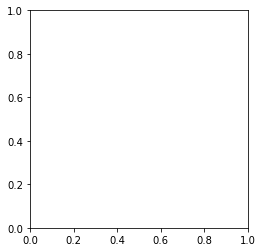

In [49]:
io.imshow(THERM);

We get an error here for the wrong dimensions. If we inspect the image data we find that the first dimension is noninformative so we will simply grab the part ofthe data we need: 

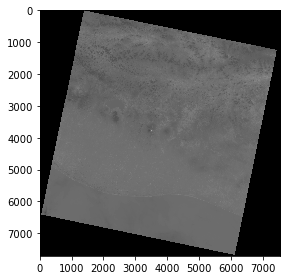

In [50]:
io.imshow(THERM[0,:,:]);

Again we will use slicing to zoom in on our area of interest, here the bright spot in the center of the image. 

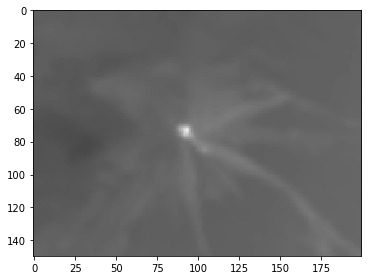

In [52]:
io.imshow(THERM[0,3700:3850,3400:3600]);

Because we have given scikit-image an image with only one channel, it has been interpreted as a black-and-white image. But, we have a thermal image so we will follow the convention for thermal images and plot using the inferno color map. Additionally, much of this image appears washed out, so we will follow our procedure above to increase the contrast. 

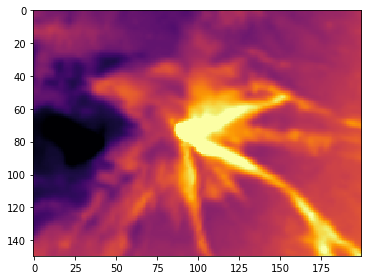

In [54]:
zoom = THERM[0,3700:3850,3400:3600]

p2, p98 = np.percentile(zoom, (2,98))
zoom_rescale = exposure.rescale_intensity(zoom, in_range=(p2, p98))

io.imshow(zoom_rescale, cmap = 'inferno');

Now you can use any of the tools we've developed earlier in the course to integrate other data analysis or visualization procedures on image data. 